## Data Preparation

In [149]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [150]:
df = pd.read_csv('training_set_VU_DM.csv')

In [151]:
pd.set_option('display.max_columns', None)

### Removing non-relevant variables
#### The variables position and gross_booking_usd are only provided for the train set and not the test-set. but they are not used as target variable or anything, so i decided to remove them

In [153]:
df = df.drop(['position', 'gross_bookings_usd'], axis=1)
df.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,prop_brand_bool,prop_location_score1,prop_location_score2,prop_log_historical_price,price_usd,promotion_flag,srch_destination_id,srch_length_of_stay,srch_booking_window,srch_adults_count,srch_children_count,srch_room_count,srch_saturday_night_bool,srch_query_affinity_score,orig_destination_distance,random_bool,comp1_rate,comp1_inv,comp1_rate_percent_diff,comp2_rate,comp2_inv,comp2_rate_percent_diff,comp3_rate,comp3_inv,comp3_rate_percent_diff,comp4_rate,comp4_inv,comp4_rate_percent_diff,comp5_rate,comp5_inv,comp5_rate_percent_diff,comp6_rate,comp6_inv,comp6_rate_percent_diff,comp7_rate,comp7_inv,comp7_rate_percent_diff,comp8_rate,comp8_inv,comp8_rate_percent_diff,click_bool,booking_bool
0,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,893,3,3.5,1,2.83,0.0438,4.95,104.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
1,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,10404,4,4.0,1,2.20,0.0149,5.03,170.74,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
2,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,21315,3,4.5,1,2.20,0.0245,4.92,179.80,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0
3,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,27348,2,4.0,1,2.83,0.0125,4.39,602.77,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,-1.0,0.0,5.0,-1.0,0.0,5.0,NaN,NaN,NaN,0.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1.0,0.0,5.0,0,0
4,1,2013-04-04 08:32:15,12,187,NaN,NaN,219,29604,4,3.5,1,2.64,0.1241,4.93,143.58,0,23246,1,0,4,0,1,1,NaN,NaN,1,NaN,NaN,NaN,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0,0


### Recategorizing variables to categorical & change missings to own category
#### First I think its a good idea to give the comp_rate and comp_inv missings their own category, since it'll be hard to impute them with values. Next there are two types of variables i think need to be changed to categorical. First are the 'id' variables since they represent a category by definition. The second are the 'competitor' variables (i.e. _rate and _inv) since they have a lot of missings which can be recoded to their own category as mentioned. 

In [154]:
# Impute missings with own category 99
# Select categorical columns
categorical_cols = ['comp1_rate', 'comp1_inv', 'comp2_rate', 'comp2_inv',
       'comp3_rate', 'comp3_inv', 'comp4_rate', 'comp4_inv',
       'comp5_rate', 'comp5_inv', 'comp6_rate', 'comp6_inv',
       'comp7_rate', 'comp7_inv', 'comp8_rate', 'comp8_inv']
# Replace missing values with 99 in selected categorical columns
df[categorical_cols] = df[categorical_cols].fillna(99)

# Change variables to category so they are correctly identified as such
# Select the columns you want to change to categorical
cols_to_convert = ['srch_id', 'site_id', 'visitor_location_country_id',
       'prop_country_id', 'prop_id', 'srch_destination_id', 
       'comp1_rate', 'comp1_inv', 'comp2_rate', 'comp2_inv',
       'comp3_rate', 'comp3_inv', 'comp4_rate', 'comp4_inv',
       'comp5_rate', 'comp5_inv', 'comp6_rate', 'comp6_inv',
       'comp7_rate', 'comp7_inv', 'comp8_rate', 'comp8_inv']

# Change the selected columns to categorical
df[cols_to_convert] = df[cols_to_convert].astype('category')

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4958347 entries, 0 to 4958346
Data columns (total 52 columns):
 #   Column                       Dtype   
---  ------                       -----   
 0   srch_id                      category
 1   date_time                    object  
 2   site_id                      category
 3   visitor_location_country_id  category
 4   visitor_hist_starrating      float64 
 5   visitor_hist_adr_usd         float64 
 6   prop_country_id              category
 7   prop_id                      category
 8   prop_starrating              int64   
 9   prop_review_score            float64 
 10  prop_brand_bool              int64   
 11  prop_location_score1         float64 
 12  prop_location_score2         float64 
 13  prop_log_historical_price    float64 
 14  price_usd                    float64 
 15  promotion_flag               int64   
 16  srch_destination_id          category
 17  srch_length_of_stay          int64   
 18  srch_booking_window   

In [155]:
# Get the count, number of unique values, and value counts (including missing values) for each column
counts = pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()})

# Print the result
counts

,count,unique,missing
srch_id,4958347,199795,0
date_time,4958347,198615,0
site_id,4958347,34,0
visitor_location_country_id,4958347,210,0
visitor_hist_starrating,251866,312,4706481
visitor_hist_adr_usd,252988,7799,4705359
prop_country_id,4958347,172,0
prop_id,4958347,129113,0
prop_starrating,4958347,6,0
prop_review_score,4950983,10,7364


### Setting outliers and extreme values to missing
#### There are certain extreme values in the dataset for certain variables that we need to address. For now I chose to use the extreme interquartile range of magnitude 30 and set every value above this to missing

In [156]:
def detect_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 30 * iqr
    upper_bound = q3 + 30 * iqr
    return (df < lower_bound) | (df > upper_bound)

# Detect outliers in the DataFrame
# Select only relevant columns. Some of them have outliers but are meaningless. 
select_cols = ['visitor_hist_adr_usd', 'price_usd', 'srch_length_of_stay', 'srch_booking_window', 'srch_query_affinity_score', 'orig_destination_distance',
'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 
'comp6_rate_percent_diff', 'comp7_rate_percent_diff', 'comp8_rate_percent_diff'] # select relevant columns

outliers = detect_outliers(df[select_cols])
# # Count the number of outliers per column
# outliers_per_col = outliers.sum()
# # Count the total number of outliers
# total_outliers = outliers_per_col.sum()

# print("Number of outliers per column:")
# print(outliers_per_col)
# print("Total number of outliers:", total_outliers)

## used for checking
# variable = ['comp1_rate_percent_diff']
# q1 = df[variable].quantile(0.25)
# q3 = df[variable].quantile(0.75)
# iqr = q3 - q1
# iqr*20

## used for checking
# outliers_adults = detect_outliers(df['price_usd'])
# print(df.loc[outliers_adults, 'price_usd'])  

# Recoding extremes to missing
df[select_cols] = df[select_cols].mask(outliers, np.nan)


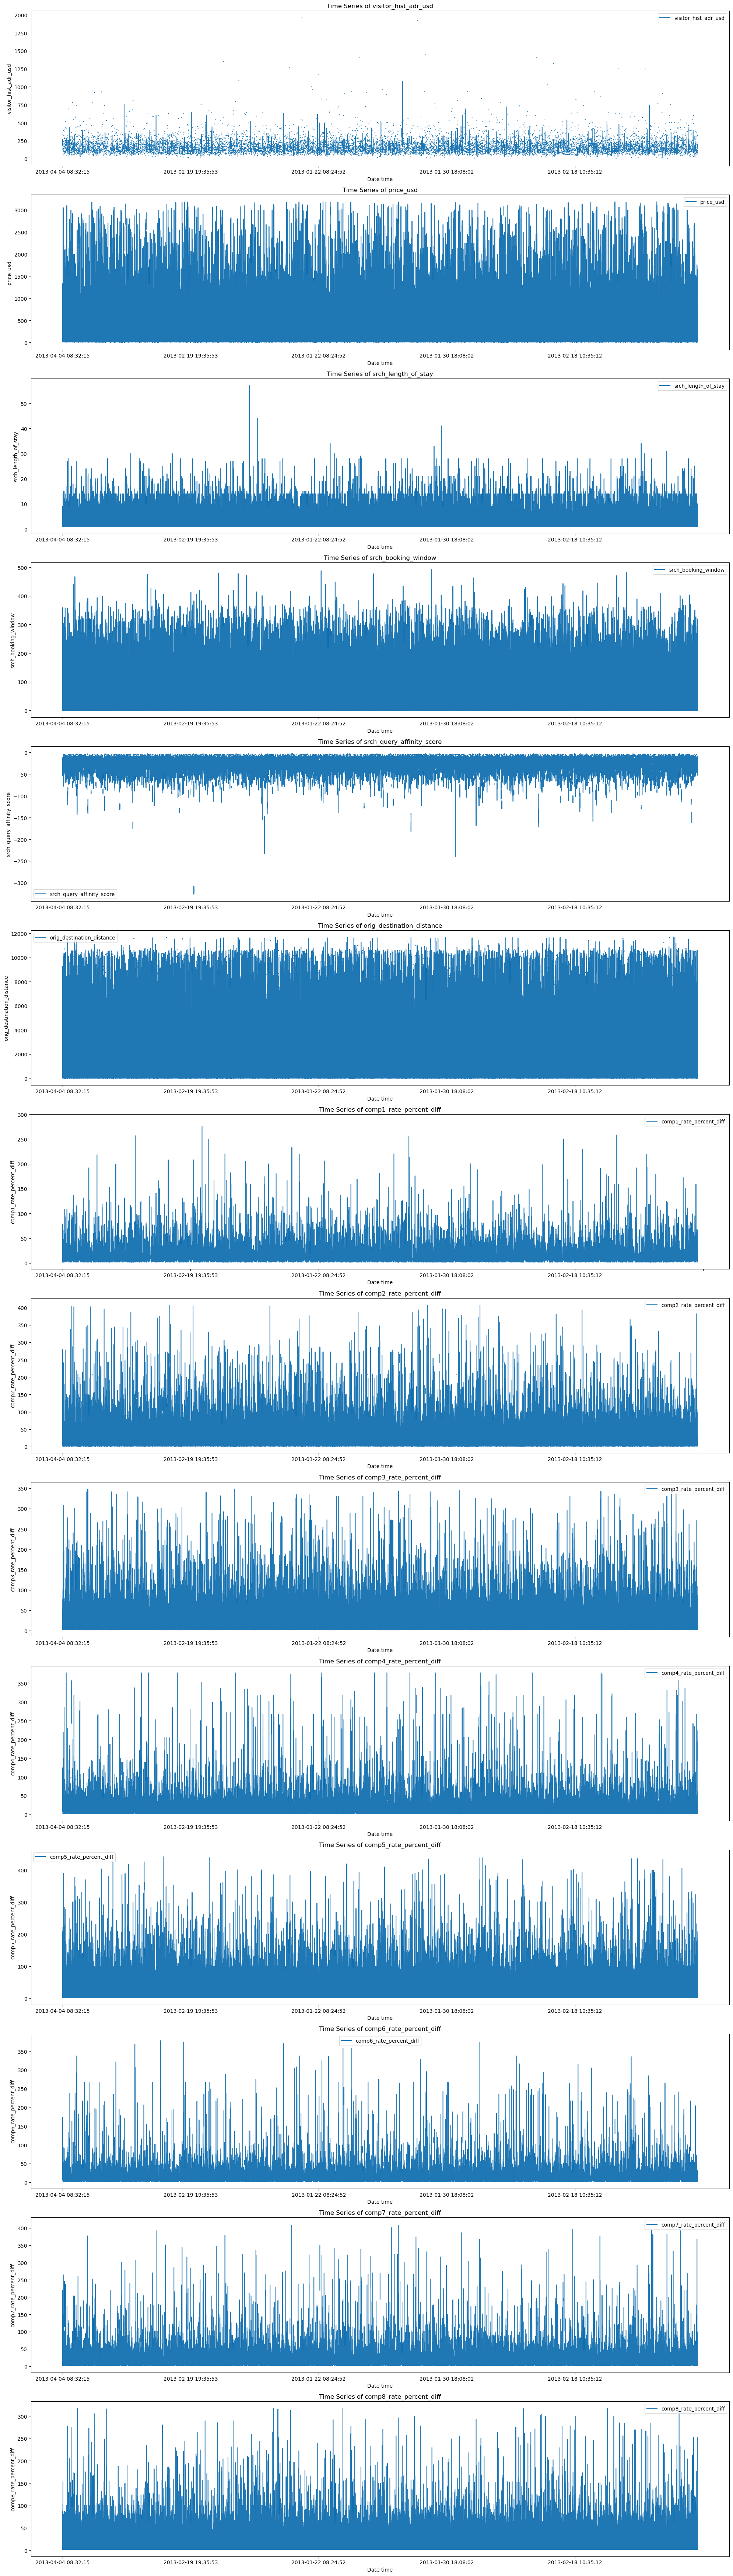

In [157]:
# Set the size of the plot
fig, axes = plt.subplots(nrows=len(select_cols), ncols=1, figsize=(20, len(select_cols)*5))

# Loop over each column and plot the time series on a separate subplot
for i, col in enumerate(select_cols):
    df.plot(ax=axes[i], x='date_time', y=col)
    axes[i].set_xlabel('Date time')
    axes[i].set_ylabel(col)
    axes[i].set_title('Time Series of ' + col)

# Adjust the layout and spacing of the subplots
plt.tight_layout()

### Impute missings based on median
#### for the remaining variables (numeric) the easiest solution is to impute based on the median. I do not necesserily see an alternative (maybe SVD, but I don't know if its approriate), and it is a quick way to build some models.

In [158]:
impute_cols= ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score2', 'price_usd', 'srch_query_affinity_score', 'orig_destination_distance', 
       'comp1_rate_percent_diff', 'comp2_rate_percent_diff', 'comp3_rate_percent_diff', 
       'comp4_rate_percent_diff', 'comp5_rate_percent_diff', 'comp6_rate_percent_diff', 
       'comp7_rate_percent_diff', 'comp8_rate_percent_diff']

# The idea is to first impute missings by prop_country_id so we atleast take into account the country
df[impute_cols] = df.groupby('prop_country_id')[impute_cols].transform(lambda x: x.fillna(x.median()))

# THere are still some missings, so we can fill the remaining missings with the overall mean per variable. We can also decide to remove the rest
df[impute_cols] = df[impute_cols].fillna(df[impute_cols].median())

In [159]:
# Get the count, number of unique values, and value counts (including missing values) for each column
counts = pd.DataFrame({'count': df.count(), 'unique': df.nunique(), 'missing': df.isnull().sum()})

# Print the result
counts

,count,unique,missing
srch_id,4958347,199795,0
date_time,4958347,198615,0
site_id,4958347,34,0
visitor_location_country_id,4958347,210,0
visitor_hist_starrating,4958347,315,0
visitor_hist_adr_usd,4958347,7806,0
prop_country_id,4958347,172,0
prop_id,4958347,129113,0
prop_starrating,4958347,6,0
prop_review_score,4958347,11,0
